In [31]:
# importação das bibliotecas necessarias

import pandas as pd                                             # biblioteca para manipulação de dados
import numpy as np                                              # biblioteca para cálculo matemático
import seaborn as sns                                           # biblioteca para visualização de dados
from sklearn.neural_network import MLPClassifier                # biblioteca para criação de modelo de rede neural
from sklearn.model_selection import train_test_split            # biblioteca para divisão de dados em conjuntos de treinamento e teste
from sklearn.preprocessing import LabelEncoder, OneHotEncoder   # biblioteca para codificação de dados
from sklearn.compose import make_column_transformer             # biblioteca para codificação de dados
from sklearn.preprocessing import StandardScaler                # biblioteca para normalização dos dados
from tensorflow.keras.models import Sequential                  # biblioteca para criação de modelo sequencial
from tensorflow.keras.layers import Dense                       # biblioteca para criação de camadas densas
from sklearn.metrics import confusion_matrix                    # biblioteca para cálculo da matriz de confusão

In [9]:
# carregamento dos dados

dataset = pd.read_csv('./data/Churn_Modelling.csv')

In [10]:
# visualização dos primeiros registros

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# visualização de algumas informações sobre o dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# pre processamento dos dados
# separação dos atributos que serão utilizados para treinamento e atributos que serão utilizados para predição

X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [13]:
# transformação dos dados categóricos em dados numéricos

labelencoder_X1 = LabelEncoder()
X[ :, 1] = labelencoder_X1.fit_transform(X[:, 1])
labelencoder_X2 = LabelEncoder()
X[ :, 2] = labelencoder_X2.fit_transform(X[:, 2])

In [14]:
# transformação dummy variables para os dados categóricos

onehotencoder = make_column_transformer((OneHotEncoder(categories='auto', sparse='False'), [1]), remainder='passthrough')
X = onehotencoder.fit_transform(X)

In [15]:
# remoção de atributos que foram transformados em dummy variables

X = X[:, 1:]

In [16]:
# visualização do primeiro registro

X[0]

array([0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [17]:
# divisão dos dados em conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Visualização tamanhos conjuntos de treinamento e teste

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [19]:
# feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# visualização do primeiro registro

X_train[0]

array([-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
        0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
        1.10643166])

In [24]:
# entrada com 11 atributos => camada oculta com 6 neurônios => camada de saída com 1 neurônio
# função de ativação oculta(relu)oculta(relu)saida(sigmoide)
# número de épocas = 100
# otimização = adam (gradiente descendente stocastico) achar o melhor valor para otimização dos pesos
# loss = binary_crossentropy
# metrica = acurácia


# criação do modelo de rede neural
nn_model = Sequential()

# definindo parametros da rede neural
nn_model.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
nn_model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
nn_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# compilando o modelo
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# treinamento do modelo
nn_model.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
800/800 [==============================] - 0s 554us/step - loss: 0.5068 - accuracy: 0.7950
Epoch 2/100
800/800 [==============================] - 1s 652us/step - loss: 0.4284 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 0s 559us/step - loss: 0.4238 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 0s 534us/step - loss: 0.4199 - accuracy: 0.7987
Epoch 5/100
800/800 [==============================] - 0s 522us/step - loss: 0.4174 - accuracy: 0.8229
Epoch 6/100
800/800 [==============================] - 0s 539us/step - loss: 0.4151 - accuracy: 0.8279
Epoch 7/100
800/800 [==============================] - 0s 586us/step - loss: 0.4140 - accuracy: 0.8299
Epoch 8/100
800/800 [==============================] - 0s 518us/step - loss: 0.4127 - accuracy: 0.8316
Epoch 9/100
800/800 [==============================] - 0s 532us/step - loss: 0.4116 - accuracy: 0.8328
Epoch 10/100
800/800 [==============================] - 0s 528us/step - l

In [27]:
# previsão dos dados de teste

y_pred = nn_model.predict(X_test)
y_pred

array([[0.21544278],
       [0.38618645],
       [0.11509904],
       ...,
       [0.23292375],
       [0.14361072],
       [0.11136103]], dtype=float32)

In [28]:
# transformação dos dados de teste em dados binários

y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
# matriz de confusão

cmm = confusion_matrix(y_test, y_pred)
cmm

array([[1547,   48],
       [ 261,  144]], dtype=int64)

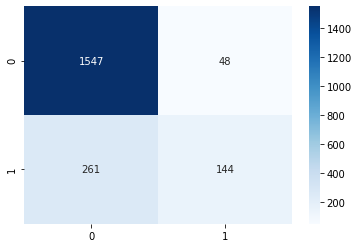

In [33]:
# visualização da matriz de confusão com seaborn

sns.heatmap(cmm, annot=True, cmap='Blues', fmt='g');